<a href="https://colab.research.google.com/github/dharshini-248/Prediction-Of-Total-Women-Crimes/blob/main/Women_crimes_time_series_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


            total_crimes
year                    
2001-01-01        218861
2002-01-01        257084
2003-01-01        257685
2004-01-01        281922
2005-01-01        281627
2006-01-01        302594
2007-01-01        327176
2008-01-01        366878
2009-01-01        383167
2010-01-01        403645
2011-01-01        431221
2012-01-01        457197
2013-01-01        575254
2014-01-01         62511
2015-01-01        311272
2016-01-01        322949
2017-01-01        345989
2018-01-01        363817
2019-01-01        391601


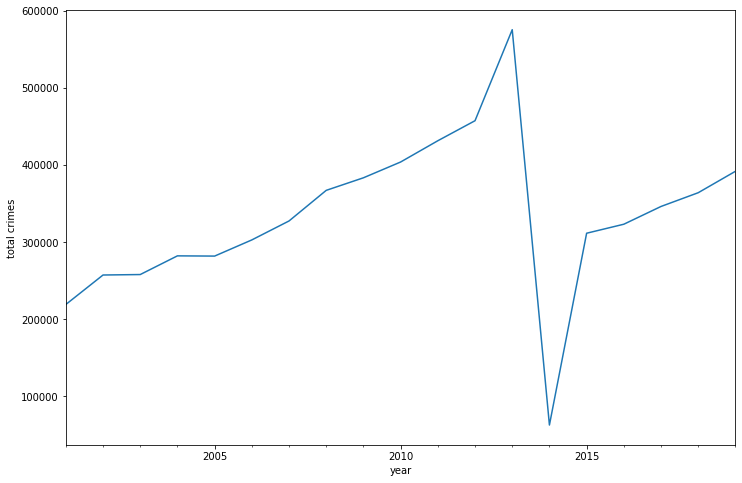

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
#import adfuller for stationery testing
dataset=pd.read_excel("time series.xlsx",parse_dates=['year'])#To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.
dataset['year']=pd.to_datetime(dataset['year'],infer_datetime_format=True)
# If True and no format is given, attempt to infer the format of the datetime strings, and if it can be inferred, switch to a faster method of parsing them. 
indexedDataset=dataset.set_index(['year'])
from datetime import datetime
indexedDataset.head(5)
plt.xlabel("Date")
plt.ylabel("total crimes")
indexedDataset['total_crimes'].plot(figsize=(12,8))
print(indexedDataset)

In [ ]:
indexedDataset.style.background_gradient(cmap='Reds')

,total_crimes
year,
2001-01-01 00:00:00,218861
2002-01-01 00:00:00,257084
2003-01-01 00:00:00,257685
2004-01-01 00:00:00,281922
2005-01-01 00:00:00,281627
2006-01-01 00:00:00,302594
2007-01-01 00:00:00,327176
2008-01-01 00:00:00,366878
2009-01-01 00:00:00,383167


In [ ]:
Tot_Cases = indexedDataset.groupby('year')['total_crimes'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,total_crimes
year,
2013-01-01 00:00:00,575254
2012-01-01 00:00:00,457197
2011-01-01 00:00:00,431221
2010-01-01 00:00:00,403645
2019-01-01 00:00:00,391601
2009-01-01 00:00:00,383167
2008-01-01 00:00:00,366878
2018-01-01 00:00:00,363817
2017-01-01 00:00:00,345989


In [ ]:
#determining rolling statistics
rolmean=indexedDataset.rolling(window=5).mean()
rolstd=indexedDataset.rolling(window=5).std()
print(rolmean,rolstd)

            total_crimes
year                    
2001-01-01           NaN
2002-01-01           NaN
2003-01-01           NaN
2004-01-01           NaN
2005-01-01      259435.8
2006-01-01      276182.4
2007-01-01      290200.8
2008-01-01      312039.4
2009-01-01      332288.4
2010-01-01      356692.0
2011-01-01      382417.4
2012-01-01      408421.6
2013-01-01      450096.8
2014-01-01      385965.6
2015-01-01      367491.0
2016-01-01      345836.6
2017-01-01      323595.0
2018-01-01      281307.6
2019-01-01      347125.6              total_crimes
year                     
2001-01-01            NaN
2002-01-01            NaN
2003-01-01            NaN
2004-01-01            NaN
2005-01-01   25753.588133
2006-01-01   19151.122560
2007-01-01   26077.205788
2008-01-01   35908.133296
2009-01-01   42601.478382
2010-01-01   41252.431110
2011-01-01   39134.541971
2012-01-01   36350.150327
2013-01-01   75346.534806
2014-01-01  192280.720169
2015-01-01  194581.293979
2016-01-01  191719.477058
2017-01

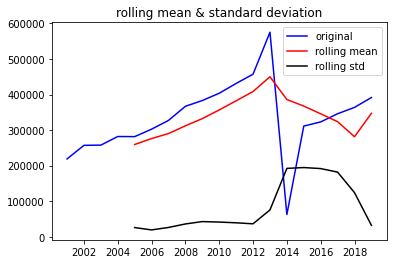

In [ ]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean & standard deviation')
plt.show(block=False)

In [ ]:
#perform ADCF test
from statsmodels.tsa.stattools import adfuller

def ad_test(indexedDataset):
  dftest=adfuller(indexedDataset,autolag='AIC')
  print('1.ADF test',dftest[0])
  print('2.p-value',dftest[1])
  print('3.num of lags',dftest[2])
  print('4.num of observations',dftest[3])
  print('5.critical values')
  for key,value in dftest[4].items():
    print(key,value)

In [ ]:
ad_test(indexedDataset['total_crimes'])

1.ADF test -3.7177724803587306
2.p-value 0.003870000713970999
3.num of lags 0
4.num of observations 18
5.critical values
1% -3.859073285322359
5% -3.0420456927297668
10% -2.6609064197530863


In [ ]:
indexedDataset_diff=indexedDataset.diff(periods=1)
indexedDataset_diff=indexedDataset_diff[1:]
indexedDataset_diff.head()


,total_crimes
year,
2002-01-01,38223.0
2003-01-01,601.0
2004-01-01,24237.0
2005-01-01,-295.0
2006-01-01,20967.0


In [ ]:
indexedDataset_diff2=indexedDataset_diff.diff(periods=1)
indexedDataset_diff2=indexedDataset_diff2[1:]
indexedDataset_diff2.head()


,total_crimes
year,
2003-01-01,-37622.0
2004-01-01,23636.0
2005-01-01,-24532.0
2006-01-01,21262.0
2007-01-01,3615.0


,total_crimes
year,
2001-01-01,NaN
2002-01-01,NaN
2003-01-01,NaN
2004-01-01,NaN
2005-01-01,0.086225
2006-01-01,0.093243
2007-01-01,0.123130
2008-01-01,0.167003
2009-01-01,0.149076


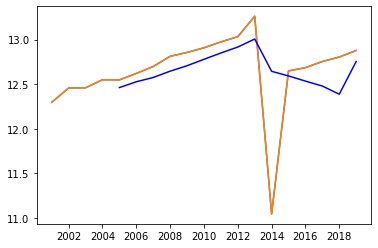

In [ ]:
#estimating trend
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)
movingaverage=indexedDataset_logscale.rolling(window=5).mean()
movingstd=indexedDataset_logscale.rolling(window=5).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color='blue')
datasetlogscaleminusmovingaverage=indexedDataset_logscale-movingaverage
datasetlogscaleminusmovingaverage.head(12)

In [ ]:
#remove Nan values 
datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(10)

,total_crimes
year,
2005-01-01,0.086225
2006-01-01,0.093243
2007-01-01,0.123130
2008-01-01,0.167003
2009-01-01,0.149076
2010-01-01,0.129151
2011-01-01,0.124390
2012-01-01,0.115960
2013-01-01,0.255701


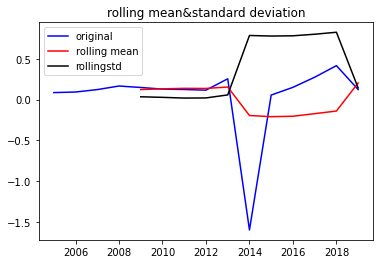

In [ ]:


from statsmodels.tsa.stattools import adfuller
def test_stationarity(indexedDataset_logscale):  
  #determining rolling statistics
  movingaverage=indexedDataset_logscale.rolling(window=5).mean()
  movingstd=indexedDataset_logscale.rolling(window=5).std()
  #plot rolling ststistics:
  orig=plt.plot(indexedDataset_logscale['total_crimes'],color='blue',label='original')
  mean=plt.plot(movingaverage,color='red',label='rolling mean')
  std=plt.plot(movingstd,color='black',label='rollingstd')
  plt.legend(loc='best')
  plt.title('rolling mean&standard deviation')
  plt.show(block=False)
test_stationarity(datasetlogscaleminusmovingaverage)

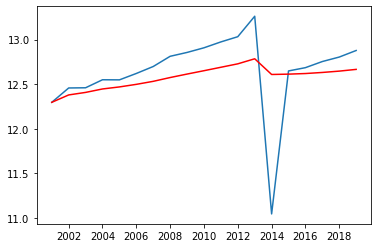

In [ ]:
exponential_decayweighted_average=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponential_decayweighted_average,color='red')

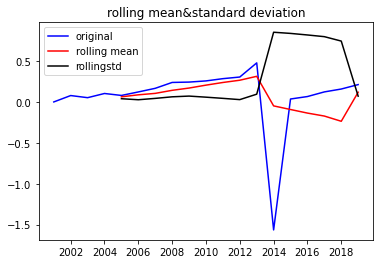

In [ ]:
datasetlogscaleminusmovingexponential_decayweighted_average=indexedDataset_logscale-exponential_decayweighted_average
test_stationarity(datasetlogscaleminusmovingexponential_decayweighted_average)

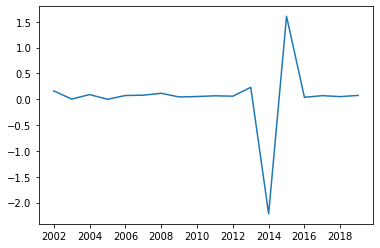

In [ ]:
datasetlogdiffshifting=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

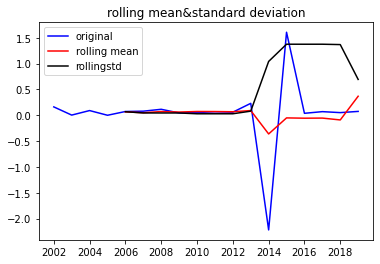

In [ ]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationarity(datasetlogdiffshifting)

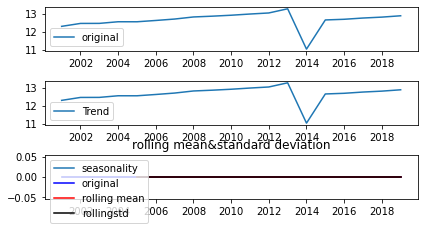

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logscale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.tight_layout()
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata)


In [ ]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetlogdiffshifting,nlags=20)
lag_pacf=pacf(datasetlogdiffshifting,nlags=20)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


Text(0.5, 1.0, 'autocorrelation function')

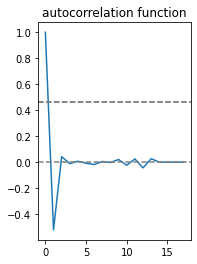

In [ ]:
#acf plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('autocorrelation function')

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


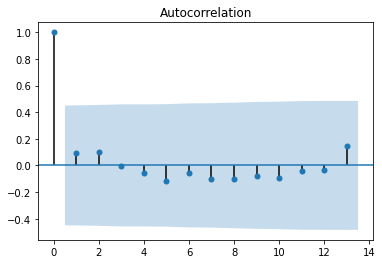

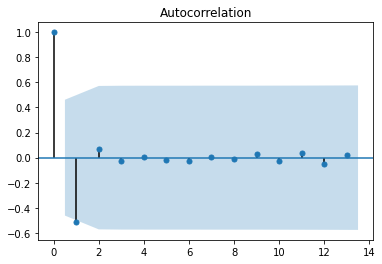

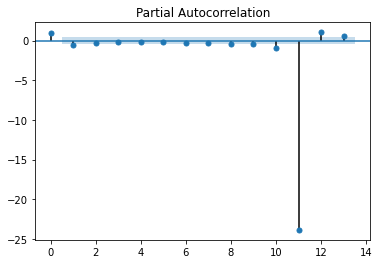

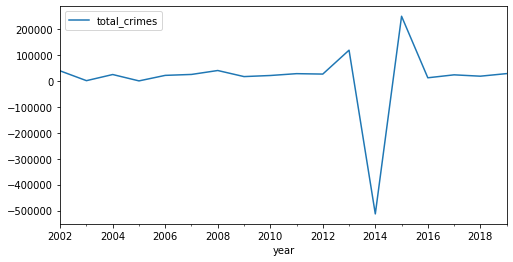

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(indexedDataset)
plot_acf(indexedDataset_diff)
plot_pacf(indexedDataset_diff)
indexedDataset_diff.plot(figsize=(8,4))


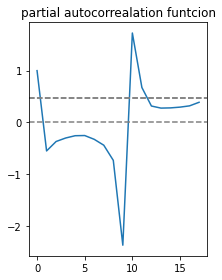

In [ ]:
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('partial autocorrealation funtcion')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


plotting AR model


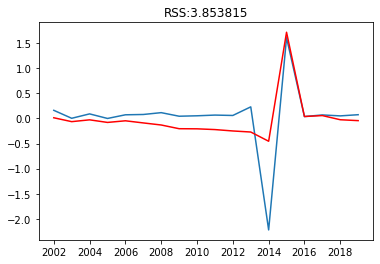

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model=ARIMA(indexedDataset_logscale,order=(2,1,2))
result_AR=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((result_AR.fittedvalues-datasetlogdiffshifting["total_crimes"])**2))
print("plotting AR model")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


plotting MA model


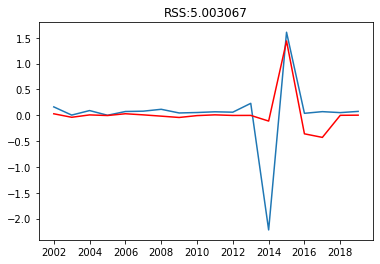

In [ ]:
#MA model
model=ARIMA(indexedDataset_logscale,order=(2,1,0))
results_MA=model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_MA.fittedvalues-datasetlogdiffshifting['total_crimes'])**2))
print('plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


year
2002-01-01    0.012695
2003-01-01   -0.063589
2004-01-01   -0.030533
2005-01-01   -0.079432
2006-01-01   -0.049435
2007-01-01   -0.089863
2008-01-01   -0.132980
2009-01-01   -0.206610
2010-01-01   -0.210289
2011-01-01   -0.224416
2012-01-01   -0.252808
2013-01-01   -0.273870
2014-01-01   -0.458258
2015-01-01    1.712307
2016-01-01    0.066349
2017-01-01    0.039666
2018-01-01   -0.016455
2019-01-01   -0.051375
dtype: float64


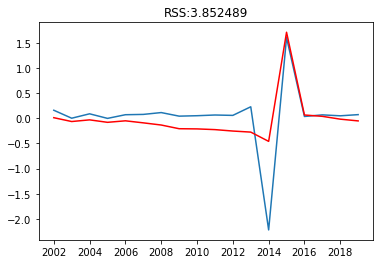

In [ ]:
model=ARIMA(indexedDataset_logscale,order=(1,1,1))
results_ARIMA=model.fit(disp=1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['total_crimes'])**2))
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff)

In [ ]:
#convert to cumulative sum:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

year
2002-01-01    0.012695
2003-01-01   -0.050894
2004-01-01   -0.081427
2005-01-01   -0.160859
2006-01-01   -0.210294
2007-01-01   -0.300158
2008-01-01   -0.433138
2009-01-01   -0.639748
2010-01-01   -0.850037
2011-01-01   -1.074452
2012-01-01   -1.327260
2013-01-01   -1.601130
2014-01-01   -2.059388
2015-01-01   -0.347080
2016-01-01   -0.280731
2017-01-01   -0.241066
2018-01-01   -0.257521
2019-01-01   -0.308896
dtype: float64


In [ ]:
predictions_ARIMA_log=pd.Series(indexedDataset_logscale['total_crimes'],index=indexedDataset_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
2001-01-01    12.296192
2002-01-01    12.469853
2003-01-01    12.408599
2004-01-01    12.467959
2005-01-01    12.387480
dtype: float64

In [ ]:
indexedDataset.shape

(19, 1)

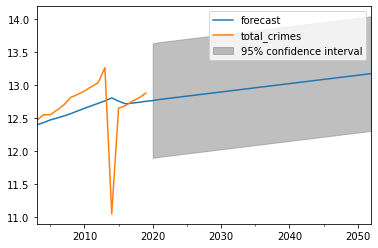

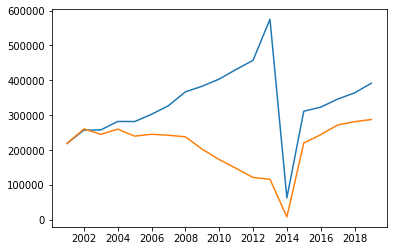

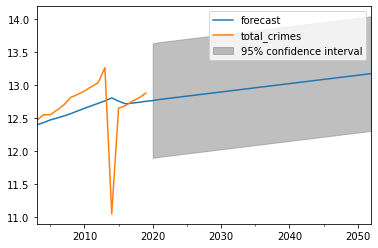

In [ ]:
#from PyQt5.QtWidgets import *
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)

#plt.yticks(range(10000000,40000000))
#plt.setLabel('left', 'Vertical Values', units='y')
plt.plot(predictions_ARIMA)
indexedDataset_logscale
results_ARIMA.plot_predict(2,51)


In [ ]:
x=results_ARIMA.forecast(steps=120)
x[1]

array([0.44389711, 0.4440836 , 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408375,
       0.44408375, 0.44408375, 0.44408375, 0.44408375, 0.44408

In [ ]:
np.exp(x[1])

array([1.55877009, 1.55906081, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906106,
       1.55906106, 1.55906106, 1.55906106, 1.55906106, 1.55906

In [ ]:
x=indexedDataset.values
x.size

19

In [ ]:
train=x[:15]
test=x[15:]

In [ ]:
print(test)
test.size

[[322949]
 [345989]
 [363817]
 [391601]]


4

In [ ]:
##arima model
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train,order=(1,2,0))
model_arima_fit=model_arima.fit(disp=-1)
print(model_arima_fit.aic)


nan


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:624: RuntimeWarning: invalid value encountered in true_divide
  newparams = np.tanh(params/2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:625: RuntimeWarning: invalid value encountered in true_divide
  tmp = np.tanh(params/2)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:225: RuntimeWarning: divide by zero encountered in log
  Z_mat.astype(complex), R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:225: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat.astype(complex), R_mat, T_mat)
/us

In [ ]:
predictions=[]
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train)
model_ar_fit=model_ar.fit()
prediction=model_ar_fit.predict(start=15,end=19)
prediction

array([-4.95043793e+06, -9.20276321e+06, -6.13108784e+07, -1.75390430e+08,
       -7.61695634e+08])

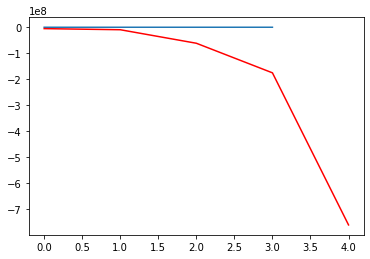

In [ ]:
plt.plot(test)
plt.plot(prediction,color='red')

In [ ]:
predictions=model_arima_fit.forecast(steps=5)[0]
predictions

array([-226268.16676154,   -2304.33352309, -564641.66704617,
       -365475.00056926, -952609.50085389])

In [ ]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
    model_arima=model_arima=ARIMA(train,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
     continue

(0, 0, 0) 395.99307049901216
(0, 0, 1) 397.8936708154797
(0, 0, 2) 399.6339456392096
(0, 0, 3) 402.8265927394607
(0, 0, 4) 403.1948418313582
(0, 1, 0) 378.7149145154741
(0, 1, 1) 373.8797502544063
(0, 2, 0) 366.5779925215285
(0, 2, 1) 357.404152811058
(1, 0, 0) 397.874082445049
(1, 1, 0) 375.4642674501636
(1, 1, 2) 377.972102321519
(1, 2, 0) nan
(2, 0, 0) 399.65812793167925
(2, 0, 1) 403.08097865435684
(2, 1, 0) 401.10552494925054
(3, 0, 0) 401.59772243777593
(3, 0, 1) 401.51539457650745
(4, 0, 0) 432.39835841098056
(4, 2, 0) 407.1704750493526
